In [10]:
using Plots, Plots.PlotMeasures
using Random
using Distributions
using JLD2
Random.seed!(42)

TaskLocalRNG()

# Noisy Sine Wave with Linearly Increasing Trend

In [11]:
function generate_noisy_sine(T::Int, noise_ampltiude::Float64, trend::Float64=0.8)
    phase = rand(Uniform(0, 2π))
    x = collect(range(0, 4pi, T))
    signal = 3 * sin.(2 * x .+ phase)
    noise = rand(Normal(0, noise_ampltiude), 100)
    trend = trend .* x
    noisy_signal_trend = signal .+ noise .+ trend
    return noisy_signal_trend, phase
end;

Plot a few examples

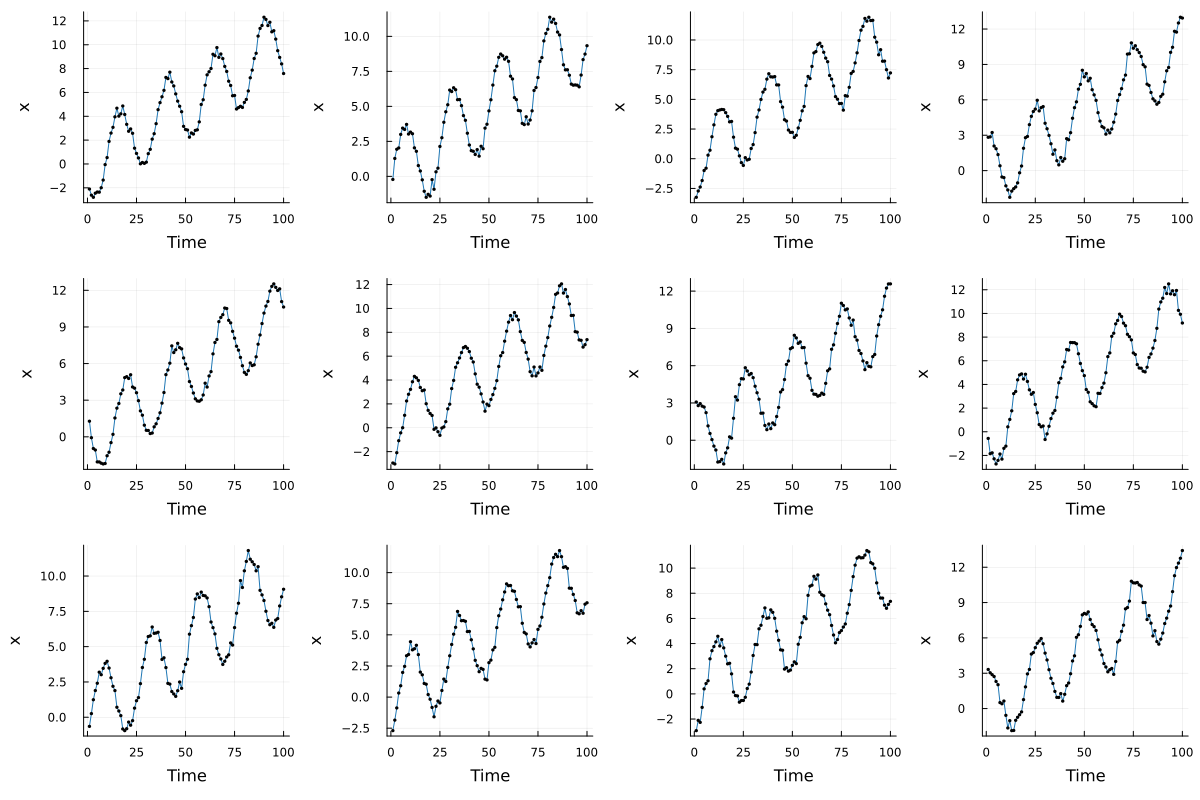

In [12]:
ps = []
for i in 1:12
    data, _ = generate_noisy_sine(100, 0.3, 0.8)
    p = plot(data, xlabel="Time", ylabel="x", label="", c=palette(:tab10)[1])
    p = scatter!(data, label="", ms=1, c=palette(:tab10)[1])
    push!(ps, p)
end
p_final = plot(ps..., size=(1200, 800), left_margin=5mm, bottom_margin=5mm)
display(p_final)
#savefig("example_ts.svg")

# Construct a dataset of instances

Standard 80/20 split. 500 total instances:
- 400 train, 100 test

In [13]:
num_train_instances = 400
num_test_instances = 100
num_tpoints = 100;
noise_amplitude = 0.3;
trend = 0.8
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
for i in 1:num_train_instances
    train_matrix[i, :], phase_val = generate_noisy_sine(num_tpoints, noise_amplitude, trend);
    phases_train[i] = phase_val
end
for i in 1:num_test_instances
    test_matrix[i, :], phase_val = generate_noisy_sine(num_tpoints, noise_amplitude, trend);
    phases_test[i] = phase_val
end

Inspect the distribution of randomised phases:

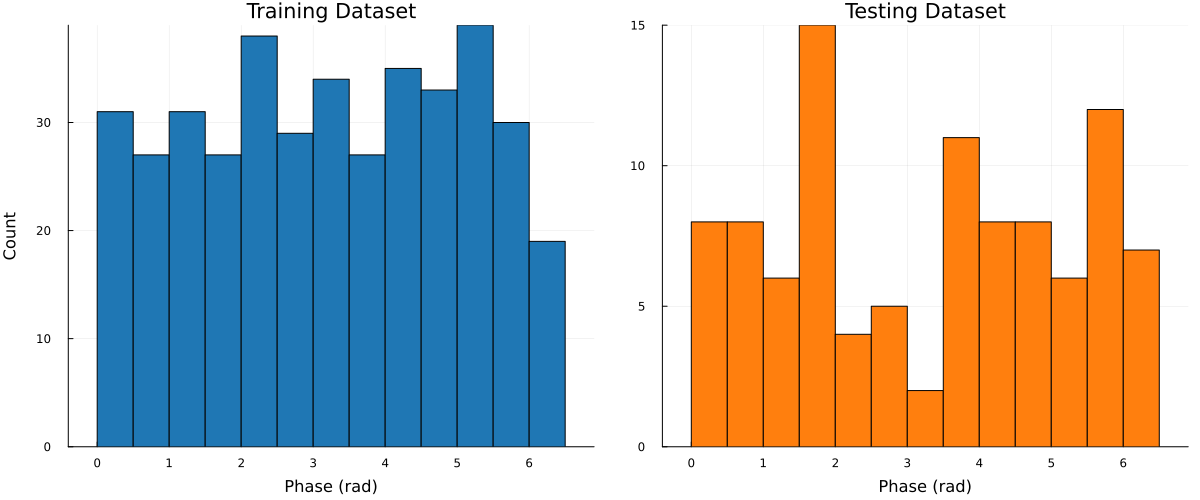

In [14]:
h1 = histogram(phases_train, bins=20, xlabel="Phase (rad)", ylabel="Count", c=palette(:tab10)[1], title="Training Dataset", label="")
h2 = histogram(phases_test, bins=20, xlabel="Phase (rad)", c=palette(:tab10)[2], title="Testing Dataset", label="")
plot(h1, h2, size=(1200, 500), bottom_margin=5mm, left_margin=5mm)
#savefig("simple_noisy_phase_dist.svg")

In [6]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;

Double check the sizes

In [7]:
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(400, 100)
(400,)
(100, 100)
(100,)


Save datasets as JLD2

In [8]:
#@save "simple_noisy_sine.jld2" X_train y_train X_test y_test